In [1]:
import numpy as np
import pandas as pd
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
# Database connection parameters
db_params = {
    'dbname': 'week1',
    'user': 'postgres',
    'password': 'habte',
    'host': 'localhost',
    'port': '5432'
}

# Create a SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}:{db_params["port"]}/{db_params["dbname"]}')

# SQL query to retrieve data
sql_query = "SELECT * FROM xdr_data;"

# Read data from PostgreSQL into a DataFrame
mydata = pd.read_sql_query(sql_query, engine)

In [2]:
# Drop rows with any missing values
mydata = mydata.dropna()

In [3]:
mydata['Start'] = pd.to_datetime(mydata['Start'], errors='coerce')
mydata['End'] = pd.to_datetime(mydata['End'], errors='coerce')

In [4]:
# Fill missing values in numeric columns with the mean
numeric_columns = mydata.select_dtypes(include='number').columns
mydata[numeric_columns] = mydata[numeric_columns].fillna(mydata[numeric_columns].mean())

In [5]:
# Print the first 5 rows of the modified DataFrame
print(mydata.head(5))

       Bearer Id               Start  Start ms                 End  End ms  \
11  1.311448e+19 2019-04-15 11:33:00     626.0 2019-04-25 18:44:00   542.0   
20  1.304243e+19 2019-04-17 00:35:00     363.0 2019-04-25 04:52:00   691.0   
68  1.304243e+19 2019-04-21 10:09:00       1.0 2019-04-25 01:39:00   272.0   
78  1.304243e+19 2019-04-21 19:35:00     344.0 2019-04-25 02:59:00   259.0   
84  1.304243e+19 2019-04-22 01:17:00     301.0 2019-04-25 01:17:00   938.0   

    Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
11   889834.0  2.082019e+14   3.366447e+10  8.600910e+13            T21335C   
20   706649.0  2.082010e+14   3.365875e+10  8.654080e+13            T29714B   
68   314961.0  2.082014e+14   3.366274e+10  3.528141e+13            T72937C   
78   285833.0  2.082018e+14   3.366917e+10  3.566261e+13            L41432B   
84   259201.0  2.082014e+14   3.366555e+10  8.637690e+13            T85779A   

    ...  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17558 entries, 11 to 149990
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Bearer Id                                 17558 non-null  float64       
 1   Start                                     17558 non-null  datetime64[ns]
 2   Start ms                                  17558 non-null  float64       
 3   End                                       17558 non-null  datetime64[ns]
 4   End ms                                    17558 non-null  float64       
 5   Dur. (ms)                                 17558 non-null  float64       
 6   IMSI                                      17558 non-null  float64       
 7   MSISDN/Number                             17558 non-null  float64       
 8   IMEI                                      17558 non-null  float64       
 9   Last Location Name             

In [7]:
# Display summary statistics for numerical columns
print(mydata.describe())

          Bearer Id                          Start      Start ms  \
count  1.755800e+04                          17558  17558.000000   
mean   1.063615e+19  2019-04-26 17:33:19.867866368    498.855621   
min    6.917538e+18            2019-04-11 13:59:00      0.000000   
25%    7.277826e+18            2019-04-25 02:48:00    247.000000   
50%    1.304243e+19            2019-04-27 02:09:00    500.000000   
75%    1.304243e+19            2019-04-28 02:40:00    750.000000   
max    1.318654e+19            2019-04-29 07:28:00    999.000000   
std    2.847730e+18                            NaN    290.378672   

                                 End        End ms     Dur. (ms)  \
count                          17558  17558.000000  1.755800e+04   
mean   2019-04-27 16:22:09.968105728    499.530983  8.212950e+04   
min              2019-04-24 23:01:00      0.000000  8.125000e+03   
25%              2019-04-26 03:06:00    252.000000  7.420700e+04   
50%              2019-04-28 00:20:00    499.000

In [8]:
# Explore unique values in the 'Handset Manufacturer' column
print(mydata['Handset Manufacturer'].unique())


['Huawei' 'Samsung' 'Apple' 'TCL Communication Ltd' 'undefined'
 'Xiaomi Communications Co Ltd' 'Wiko Global Sasu' 'Netgear Inc'
 'Neel Enterprise' 'Sony Mobile Communications Ab' 'Nokia'
 'Tp-Link Technologies Co Ltd' 'TP-Link Technologies Co Ltd'
 'D-Link Corporation' 'Oneplus Technology (Shenzhen) Co Ltd' 'Asustek'
 'Lg' 'Lenovo' 'LG' 'Google Inc' 'Sony Mobile Communications AB'
 'Hmd Global Oy' 'Archos Sa' 'Dn Electronics' 'Sfr'
 'Tcl Communication Ltd' 'Spa Condor Electronics' 'Sierra Wireless'
 'ASUSTeK' 'Crosscall' 'Shenzhen Fortuneship Technology Co Ltd'
 'Microsoft Mobile Oy' 'Zyxel Communications Corp' 'Htc'
 'Lemobile Information Technology (Beijing) Co Ltd' 'HTC' 'Oppo'
 'Orbita Telecom Ltd' 'Zte' 'Bird' 'Ovvi-Cellphone Tech. Inc.' 'Rim'
 'Kvd International Group Limited' 'Wiko'
 'Tianlong International (Hk) Co Ltd' 'New-Bund Technology Co Limited']


In [9]:
# Analyze average Round-Trip Time (RTT) for Downlink (DL)
average_rtt_dl = mydata['Avg RTT DL (ms)'].mean()
print(f"Average RTT DL: {average_rtt_dl} ms")

# Analyze TCP Download Retransmission Volume
tcp_dl_retransmission = mydata['TCP DL Retrans. Vol (Bytes)'].sum()
print(f"Total TCP DL Retransmission Volume: {tcp_dl_retransmission} Bytes")


Average RTT DL: 96.11829365531382 ms
Total TCP DL Retransmission Volume: 724600709694.0 Bytes


In [10]:
# Count the number of occurrences of each handset manufacturer
manufacturer_counts = mydata['Handset Manufacturer'].value_counts()
print(manufacturer_counts)


Handset Manufacturer
Huawei                                              10434
Apple                                                4362
Samsung                                              1984
undefined                                             451
Sony Mobile Communications Ab                          71
Xiaomi Communications Co Ltd                           46
Oneplus Technology (Shenzhen) Co Ltd                   42
Wiko Global Sasu                                       27
Asustek                                                19
Lg                                                     10
TP-Link Technologies Co Ltd                             9
Tp-Link Technologies Co Ltd                             8
Lenovo                                                  8
TCL Communication Ltd                                   7
Tcl Communication Ltd                                   6
D-Link Corporation                                      6
Sony Mobile Communications AB                      

In [11]:
# Analyze data consumption for YouTube
youtube_dl_total = mydata['Youtube DL (Bytes)'].sum()
youtube_ul_total = mydata['Youtube UL (Bytes)'].sum()
print(f"Total YouTube Data Usage: DL - {youtube_dl_total} Bytes, UL - {youtube_ul_total} Bytes")

Total YouTube Data Usage: DL - 205777933025.0 Bytes, UL - 193956392499.0 Bytes


/home/habte/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


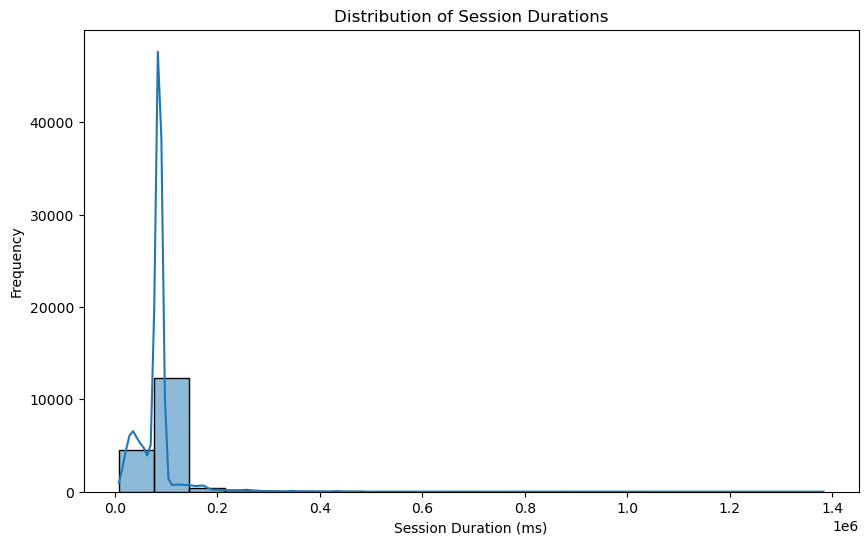

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for session duration
plt.figure(figsize=(10, 6))
sns.histplot(mydata['Dur. (ms)'], bins=20, kde=True)
plt.title('Distribution of Session Durations')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Calculate the average RTT for Downlink (DL) and Uplink (UL)
avg_rtt_dl = mydata['Avg RTT DL (ms)'].mean()
avg_rtt_ul = mydata['Avg RTT UL (ms)'].mean()

print(f"Average RTT DL: {avg_rtt_dl} ms")
print(f"Average RTT UL: {avg_rtt_ul} ms")


Average RTT DL: 96.11829365531382 ms
Average RTT UL: 28.50495500626495 ms


In [14]:
# Calculate total TCP Download and Upload Retransmission Volumes
total_tcp_dl_retrans = mydata['TCP DL Retrans. Vol (Bytes)'].sum()
total_tcp_ul_retrans = mydata['TCP UL Retrans. Vol (Bytes)'].sum()

print(f"Total TCP DL Retransmission Volume: {total_tcp_dl_retrans} Bytes")
print(f"Total TCP UL Retransmission Volume: {total_tcp_ul_retrans} Bytes")


Total TCP DL Retransmission Volume: 724600709694.0 Bytes
Total TCP UL Retransmission Volume: 33649857551.0 Bytes


In [15]:
# Assuming you have columns 'Total UL (Bytes)' and 'Total DL (Bytes)' for data transferred
mydata['TCP Throughput DL (kbps)'] = (mydata['Total DL (Bytes)'] * 8) / (mydata['Dur. (ms)'] / 1000) / 1024

# Display the average TCP Throughput for Downlink
avg_tcp_throughput_dl = mydata['TCP Throughput DL (kbps)'].mean()
print(f"Average TCP Throughput DL: {avg_tcp_throughput_dl} kbps")


Average TCP Throughput DL: 55323.0682440847 kbps


In [16]:
# Explore unique handset types and count occurrences
unique_handset_types = mydata['Handset Type'].unique()
handset_type_counts = mydata['Handset Type'].value_counts()

print("Unique Handset Types:", unique_handset_types)
print("\nHandset Type Counts:")
print(handset_type_counts)

Unique Handset Types: ['Huawei B593S-22' 'Huawei E5180' 'Samsung Galaxy A8 (2018)'
 'Samsung Galaxy S9 Plus (Sm-G965F)' 'Huawei B528S-23A'
 'Apple iPad Pro 10.5 (A1709)' 'Huawei P8 Lite'
 'Tcl Communicatio. Linkzone' 'undefined' 'Huawei P10'
 'Samsung Galaxy J6+' 'Xiaomi Communica. Redmi Note5'
 'Wiko Global Sasu Wiko Lenny4' 'Apple iPhone 8 Plus (A1897)' 'Huawei P20'
 'Apple iPhone 7 (A1778)' 'Apple iPhone Xr (A2105)' 'Huawei E5573B'
 'Samsung Galaxy A3 (Sm-A320)' 'Apple iPhone 6 (A1586)'
 'Apple iPhone X (A1901)' 'Samsung Galaxy S8 (Sm-G950F)'
 'Apple iPhone 8 (A1905)' 'Apple iPhone 6S (A1688)'
 'Samsung Galaxy S8 Plus (Sm-G955F)' 'Apple iPhone 7 Plus (A1784)'
 'Samsung Galaxy S7 (Sm-G930X)' 'Apple iPhone 6S Plus (A1687)'
 'Apple iPhone 7 (A1779)' 'Netgear Inc Aircard 810S'
 'Samsung Galaxy Grand Prime (Sm-G530X)'
 'Samsung Galaxy S7 Edge (Sm-G935X)'
 'Neel Enterprise Kolor Crosscalltrekker-X2' 'Samsung Galaxy J6'
 'Apple iPhone Xs (A2097)' 'Huawei P20 Lite Huawei Nova 3E'
 'Samsung 

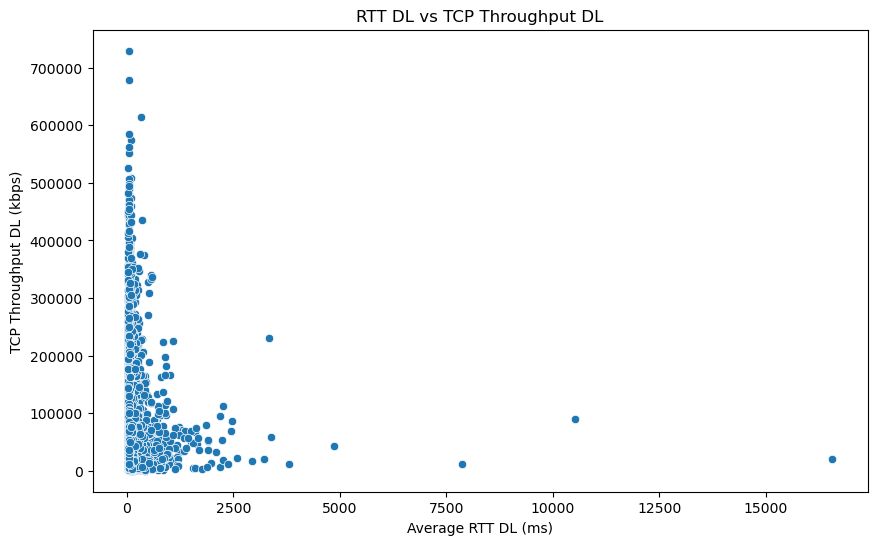

In [17]:
# Create a scatter plot to visualize the relationship between RTT DL and TCP Throughput DL
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mydata['Avg RTT DL (ms)'], y=mydata['TCP Throughput DL (kbps)'])
plt.title('RTT DL vs TCP Throughput DL')
plt.xlabel('Average RTT DL (ms)')
plt.ylabel('TCP Throughput DL (kbps)')
plt.show()

In [18]:
# Group by customer (MSISDN/Number) and calculate the average TCP retransmission
average_tcp_retransmission_per_customer = mydata.groupby('MSISDN/Number')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean()

# Calculate the overall average TCP retransmission across all customers
overall_avg_tcp_retransmission = average_tcp_retransmission_per_customer.mean().mean()

print(f"Overall Average TCP Retransmission: {overall_avg_tcp_retransmission} Bytes")

# Display the per-customer average TCP retransmission
print("Per-Customer Average TCP Retransmission:")
print(average_tcp_retransmission_per_customer)


Overall Average TCP Retransmission: 19357041.332119364 Bytes
Per-Customer Average TCP Retransmission:
               TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)
MSISDN/Number                                                          
3.360101e+10                     9349630.0                      21202.0
3.360103e+10                     2251948.0                      73549.0
3.360105e+10                     7726458.0                      77103.0
3.360106e+10                     1831411.0                       5320.0
3.360108e+10                     2305944.0                       1274.0
...                                    ...                          ...
3.378968e+10                      459884.0                      11477.0
3.378991e+10                      126155.0                      22684.0
3.378992e+10                     1203027.0                      26518.0
3.378994e+10                     2714043.0                      89961.0
3.378998e+10                      

In [19]:
# Group by customer (MSISDN/Number) and calculate the average RTT
average_rtt_per_customer = mydata.groupby('MSISDN/Number')[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean()

# Calculate the overall average RTT across all customers
overall_avg_rtt = average_rtt_per_customer.mean().mean()

print(f"Overall Average RTT: {overall_avg_rtt} ms")

# Display the per-customer average RTT
print("Per-Customer Average RTT:")
print(average_rtt_per_customer)


Overall Average RTT: 59.99074670578654 ms
Per-Customer Average RTT:
               Avg RTT DL (ms)  Avg RTT UL (ms)
MSISDN/Number                                  
3.360101e+10              86.0              5.0
3.360103e+10              32.0             28.0
3.360105e+10             218.0             33.0
3.360106e+10              48.0              7.0
3.360108e+10              39.0              5.0
...                        ...              ...
3.378968e+10              61.0              6.0
3.378991e+10              56.0             11.0
3.378992e+10              78.0             50.0
3.378994e+10              39.0             13.0
3.378998e+10              58.0             11.0

[13682 rows x 2 columns]


In [20]:
# Group by customer (MSISDN/Number) and find the most common handset type
most_common_handset_per_customer = mydata.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.value_counts().index[0])

# Display the most common handset type for each customer
print("Most Common Handset Type per Customer:")
print(most_common_handset_per_customer)


Most Common Handset Type per Customer:
MSISDN/Number
3.360101e+10              Apple iPhone Se (A1723)
3.360103e+10          Apple iPhone 8 Plus (A1897)
3.360105e+10     Samsung Galaxy Note 8 (Sm-N950F)
3.360106e+10         Samsung Galaxy S8 (Sm-G950F)
3.360108e+10              Apple iPhone Xs (A2097)
                              ...                
3.378968e+10       Huawei P20 Lite Huawei Nova 3E
3.378991e+10    Samsung Galaxy S9 Plus (Sm-G965F)
3.378992e+10    Samsung Galaxy S7 Edge (Sm-G935X)
3.378994e+10        Samsung Galaxy S9 Sm-G960F Ds
3.378998e+10                            undefined
Name: Handset Type, Length: 13682, dtype: object


In [21]:
# Assuming you have columns 'Avg Bearer TP DL (kbps)' and 'Avg Bearer TP UL (kbps)' for throughput
# Group by customer (MSISDN/Number) and calculate the average throughput
average_throughput_per_customer = mydata.groupby('MSISDN/Number')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean()

# Calculate the overall average throughput across all customers
overall_avg_throughput = average_throughput_per_customer.mean().mean()

print(f"Overall Average Throughput: {overall_avg_throughput} kbps")

# Display the per-customer average throughput
print("Per-Customer Average Throughput:")
print(average_throughput_per_customer)


Overall Average Throughput: 30127.321542990096 kbps
Per-Customer Average Throughput:
               Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)
MSISDN/Number                                                  
3.360101e+10                   40372.0                  16409.0
3.360103e+10                   34682.0                   3508.0
3.360105e+10                   51392.0                   4958.0
3.360106e+10                   42192.0                   4239.0
3.360108e+10                   66907.0                  41451.0
...                                ...                      ...
3.378968e+10                    9896.0                   5983.0
3.378991e+10                   43852.0                  16301.0
3.378992e+10                   37357.0                   5948.0
3.378994e+10                  130359.0                  10953.0
3.378998e+10                  157748.0                   5237.0

[13682 rows x 2 columns]


In [22]:
# Top 10 TCP DL Retransmission values
top_tcp_retrans_dl = mydata['TCP DL Retrans. Vol (Bytes)'].nlargest(10)
print("Top 10 TCP DL Retransmission Values:")
print(top_tcp_retrans_dl)

# Top 10 TCP UL Retransmission values
top_tcp_retrans_ul = mydata['TCP UL Retrans. Vol (Bytes)'].nlargest(10)
print("\nTop 10 TCP UL Retransmission Values:")
print(top_tcp_retrans_ul)


Top 10 TCP DL Retransmission Values:
135678    4.291380e+09
34645     4.289877e+09
140813    4.289488e+09
3782      4.288060e+09
119677    4.275259e+09
41209     4.254644e+09
923       4.131046e+09
138855    4.117753e+09
122575    4.093164e+09
141006    4.027390e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Top 10 TCP UL Retransmission Values:
36203     2.908226e+09
76644     2.636857e+09
67308     2.455600e+09
1505      2.260359e+09
133264    1.751384e+09
35138     1.727810e+09
142220    1.237862e+09
142432    7.948258e+08
66072     7.195718e+08
1381      5.262463e+08
Name: TCP UL Retrans. Vol (Bytes), dtype: float64


In [23]:
# Bottom 10 TCP DL Retransmission values
bottom_tcp_retrans_dl = mydata['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)
print("\nBottom 10 TCP DL Retransmission Values:")
print(bottom_tcp_retrans_dl)

# Bottom 10 TCP UL Retransmission values
bottom_tcp_retrans_ul = mydata['TCP UL Retrans. Vol (Bytes)'].nsmallest(10)
print("\nBottom 10 TCP UL Retransmission Values:")
print(bottom_tcp_retrans_ul)



Bottom 10 TCP DL Retransmission Values:
23627     35.0
4232      38.0
7993      38.0
8880      38.0
24209     38.0
38669     38.0
114861    38.0
117664    38.0
123780    38.0
20099     42.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Bottom 10 TCP UL Retransmission Values:
38407      1.0
84903      2.0
135782     2.0
10019      3.0
22113      3.0
4963       4.0
13929      6.0
36134      7.0
120823    10.0
61418     17.0
Name: TCP UL Retrans. Vol (Bytes), dtype: float64


In [24]:
# Most frequent TCP DL Retransmission values
most_frequent_tcp_retrans_dl = mydata['TCP DL Retrans. Vol (Bytes)'].mode()
print("\nMost Frequent TCP DL Retransmission Value:")
print(most_frequent_tcp_retrans_dl)

# Most frequent TCP UL Retransmission values
most_frequent_tcp_retrans_ul = mydata['TCP UL Retrans. Vol (Bytes)'].mode()
print("\nMost Frequent TCP UL Retransmission Value:")
print(most_frequent_tcp_retrans_ul)



Most Frequent TCP DL Retransmission Value:
0    2660.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Most Frequent TCP UL Retransmission Value:
0    1330.0
Name: TCP UL Retrans. Vol (Bytes), dtype: float64


In [25]:
top_rtt_dl = mydata['Avg RTT DL (ms)'].nlargest(10)
top_rtt_ul = mydata['Avg RTT UL (ms)'].nlargest(10)
print("\nTop 10 RTT DL Values:")
print(top_rtt_dl)
print("\nTop 10 RTT UL Values:")
print(top_rtt_ul)



Top 10 RTT DL Values:
97488     16565.0
43638     10519.0
98138      7866.0
30755      4869.0
146348     3813.0
77445      3388.0
10710      3342.0
117616     3215.0
139402     2936.0
87440      2575.0
Name: Avg RTT DL (ms), dtype: float64

Top 10 RTT UL Values:
42107     4226.0
121735    2283.0
37480     1944.0
66812     1907.0
136591    1629.0
6421      1529.0
34819     1345.0
84211     1273.0
140092    1203.0
39674      805.0
Name: Avg RTT UL (ms), dtype: float64


In [26]:
bottom_rtt_dl = mydata['Avg RTT DL (ms)'].nsmallest(10)
bottom_rtt_ul = mydata['Avg RTT UL (ms)'].nsmallest(10)
print("\nBottom 10 RTT DL Values:")
print(bottom_rtt_dl)
print("\nBottom 10 RTT UL Values:")
print(bottom_rtt_ul)



Bottom 10 RTT DL Values:
79333     17.0
34584     18.0
121373    18.0
123222    18.0
125952    18.0
133309    18.0
22336     19.0
22823     19.0
31240     19.0
37172     19.0
Name: Avg RTT DL (ms), dtype: float64

Bottom 10 RTT UL Values:
656      1.0
6486     1.0
6946     1.0
7540     1.0
8579     1.0
13192    1.0
13251    1.0
15251    1.0
17033    1.0
18113    1.0
Name: Avg RTT UL (ms), dtype: float64


In [27]:
most_frequent_rtt_dl = mydata['Avg RTT DL (ms)'].mode()
most_frequent_rtt_ul = mydata['Avg RTT UL (ms)'].mode()
print("\nMost Frequent RTT DL Value:")
print(most_frequent_rtt_dl)
print("\nMost Frequent RTT UL Value:")
print(most_frequent_rtt_ul)



Most Frequent RTT DL Value:
0    52.0
Name: Avg RTT DL (ms), dtype: float64

Most Frequent RTT UL Value:
0    4.0
Name: Avg RTT UL (ms), dtype: float64


In [28]:
top_throughput_dl = mydata['Avg Bearer TP DL (kbps)'].nlargest(10)
top_throughput_ul = mydata['Avg Bearer TP UL (kbps)'].nlargest(10)
print("\nTop 10 Throughput DL Values:")
print(top_throughput_dl)
print("\nTop 10 Throughput UL Values:")
print(top_throughput_ul)



Top 10 Throughput DL Values:
120884    378160.0
141262    299257.0
143670    299002.0
92198     269362.0
117784    266332.0
115843    265440.0
116558    263047.0
41576     254253.0
127472    251660.0
91318     246514.0
Name: Avg Bearer TP DL (kbps), dtype: float64

Top 10 Throughput UL Values:
92384     58613.0
5926      57792.0
137168    57750.0
116888    57006.0
99297     56763.0
91318     54032.0
45409     53572.0
9283      52640.0
91626     52084.0
124760    51562.0
Name: Avg Bearer TP UL (kbps), dtype: float64


In [29]:
bottom_throughput_dl = mydata['Avg Bearer TP DL (kbps)'].nsmallest(10)
bottom_throughput_ul = mydata['Avg Bearer TP UL (kbps)'].nsmallest(10)
print("\nBottom 10 Throughput DL Values:")
print(bottom_throughput_dl)
print("\nBottom 10 Throughput UL Values:")
print(bottom_throughput_ul)



Bottom 10 Throughput DL Values:
145730    5242.0
87591     5254.0
113401    5260.0
118464    5344.0
67552     5372.0
17395     5400.0
60283     5401.0
36846     5452.0
9758      5458.0
118165    5464.0
Name: Avg Bearer TP DL (kbps), dtype: float64

Bottom 10 Throughput UL Values:
3206      3146.0
12893     3146.0
77464     3146.0
94990     3146.0
3704      3147.0
116019    3147.0
118145    3147.0
133437    3147.0
12714     3148.0
117346    3148.0
Name: Avg Bearer TP UL (kbps), dtype: float64


In [30]:
most_frequent_throughput_dl = mydata['Avg Bearer TP DL (kbps)'].mode()
most_frequent_throughput_ul = mydata['Avg Bearer TP UL (kbps)'].mode()
print("\nMost Frequent Throughput DL Value:")
print(most_frequent_throughput_dl)
print("\nMost Frequent Throughput UL Value:")
print(most_frequent_throughput_ul)



Most Frequent Throughput DL Value:
0    39981.0
Name: Avg Bearer TP DL (kbps), dtype: float64

Most Frequent Throughput UL Value:
0    3441.0
Name: Avg Bearer TP UL (kbps), dtype: float64


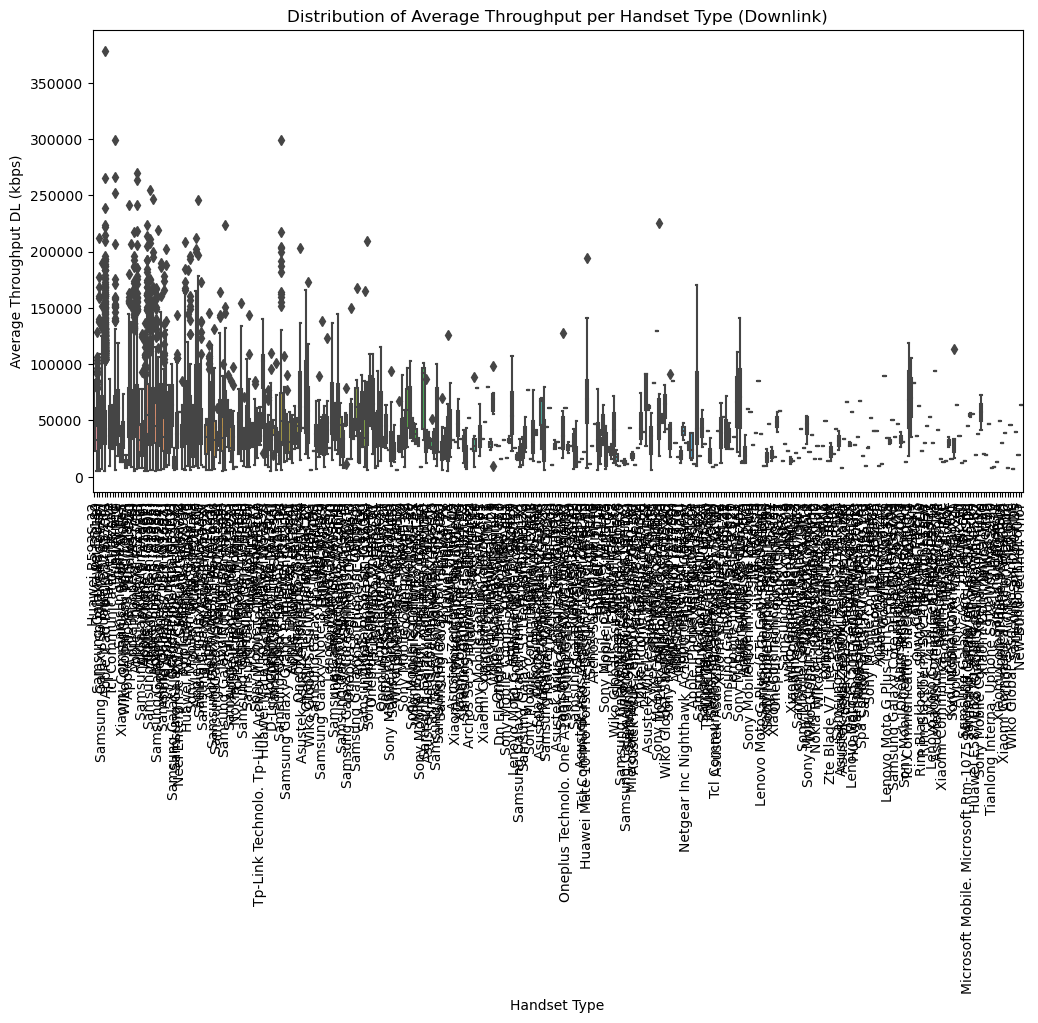

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by handset type and calculate the average throughput
average_throughput_per_type = mydata.groupby('Handset Type')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean()

# Plot the distribution of Average Throughput
plt.figure(figsize=(12, 6))
sns.boxplot(data=mydata, x='Handset Type', y='Avg Bearer TP DL (kbps)')
plt.xticks(rotation=90)
plt.title('Distribution of Average Throughput per Handset Type (Downlink)')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput DL (kbps)')
plt.show()


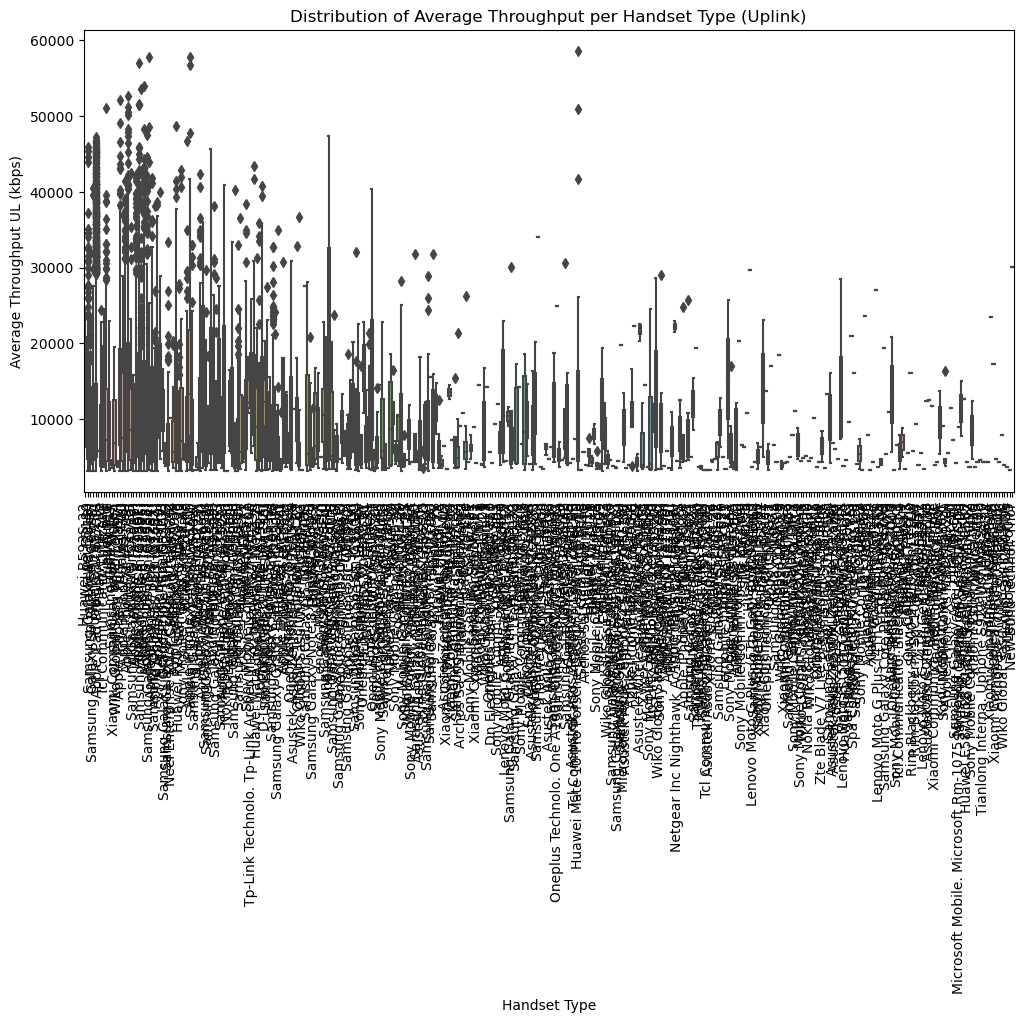

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=mydata, x='Handset Type', y='Avg Bearer TP UL (kbps)')
plt.xticks(rotation=90)
plt.title('Distribution of Average Throughput per Handset Type (Uplink)')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput UL (kbps)')
plt.show()


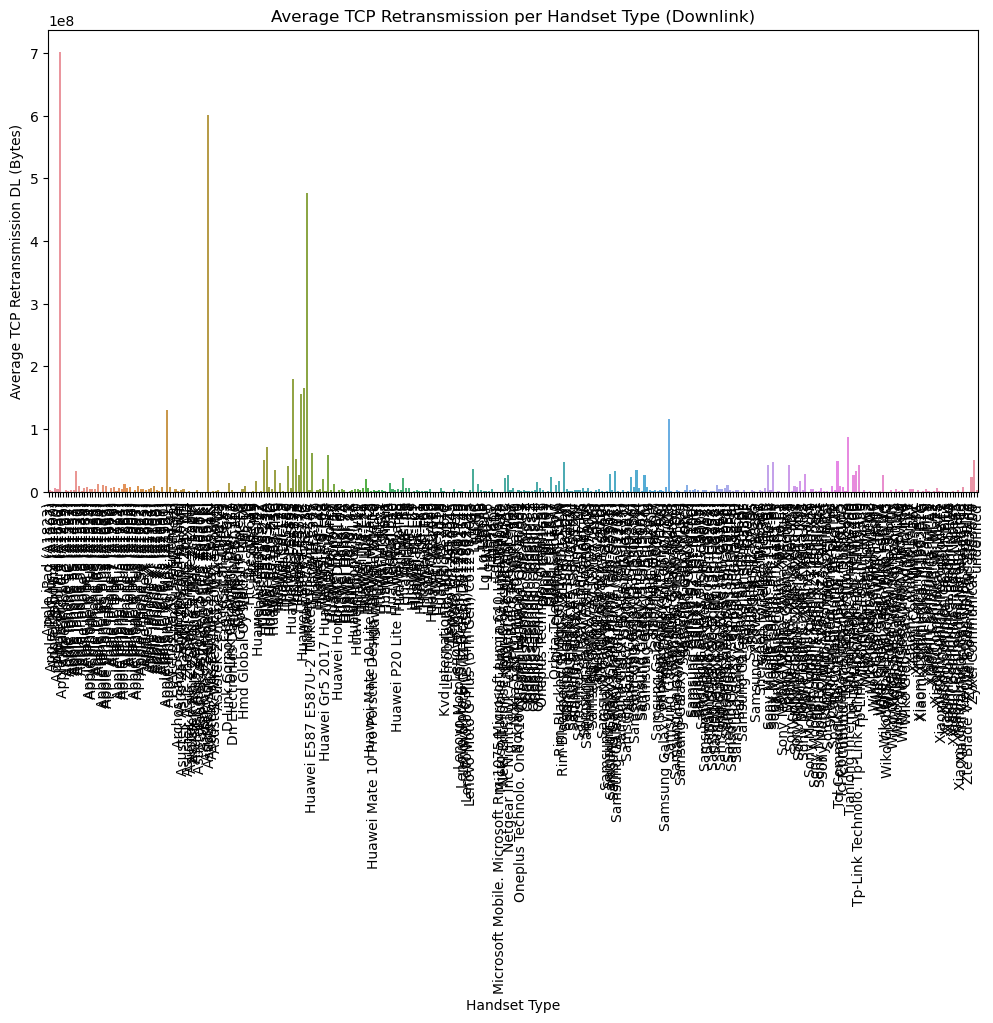

In [33]:
# Group by handset type and calculate the average TCP retransmission
average_tcp_retransmission_per_type = mydata.groupby('Handset Type')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean()

# Plot the average TCP retransmission per handset type
plt.figure(figsize=(12, 6))
sns.barplot(x=average_tcp_retransmission_per_type.index, y=average_tcp_retransmission_per_type['TCP DL Retrans. Vol (Bytes)'])
plt.xticks(rotation=90)
plt.title('Average TCP Retransmission per Handset Type (Downlink)')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission DL (Bytes)')
plt.show()


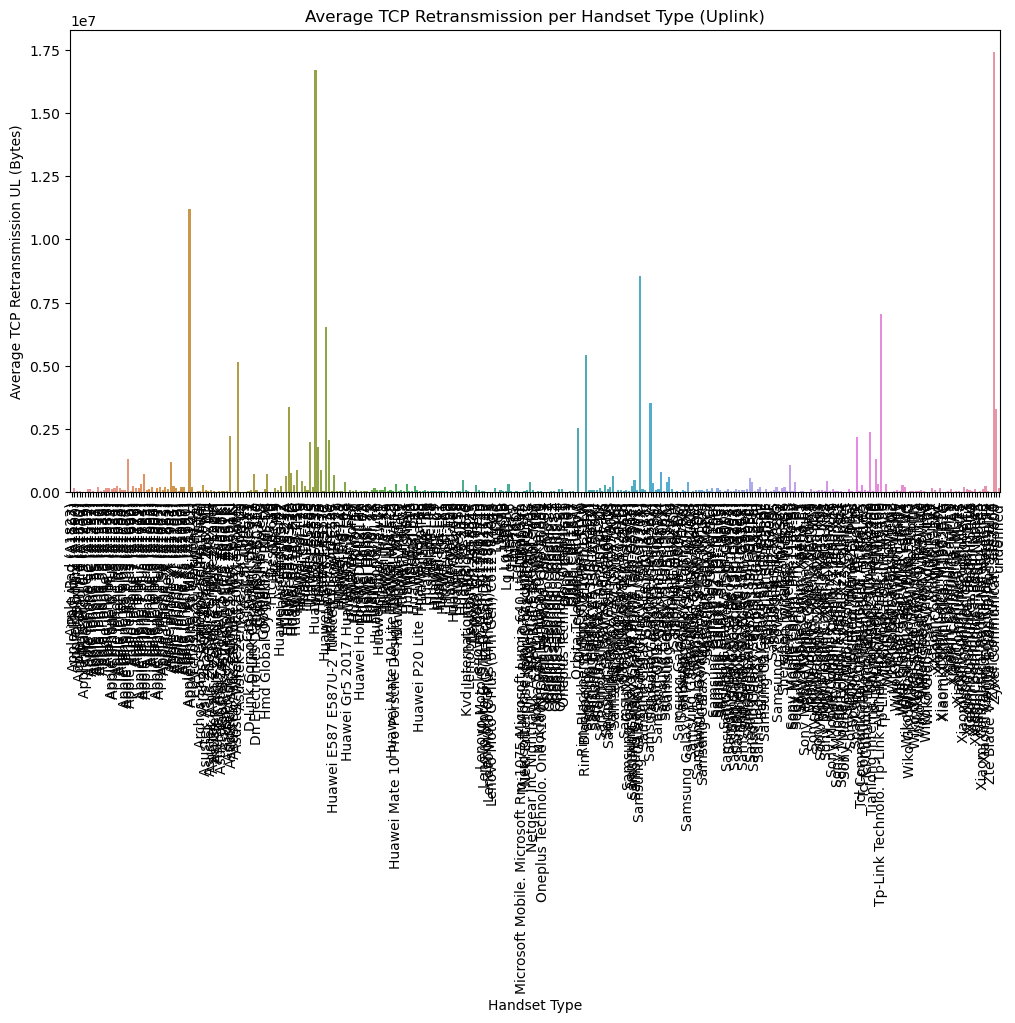

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=average_tcp_retransmission_per_type.index, y=average_tcp_retransmission_per_type['TCP UL Retrans. Vol (Bytes)'])
plt.xticks(rotation=90)
plt.title('Average TCP Retransmission per Handset Type (Uplink)')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission UL (Bytes)')
plt.show()


/home/habte/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Sizes:
Cluster
0    12867
1        7
2     4684
Name: count, dtype: int64


/home/habte/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/habte/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/habte/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/habte/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


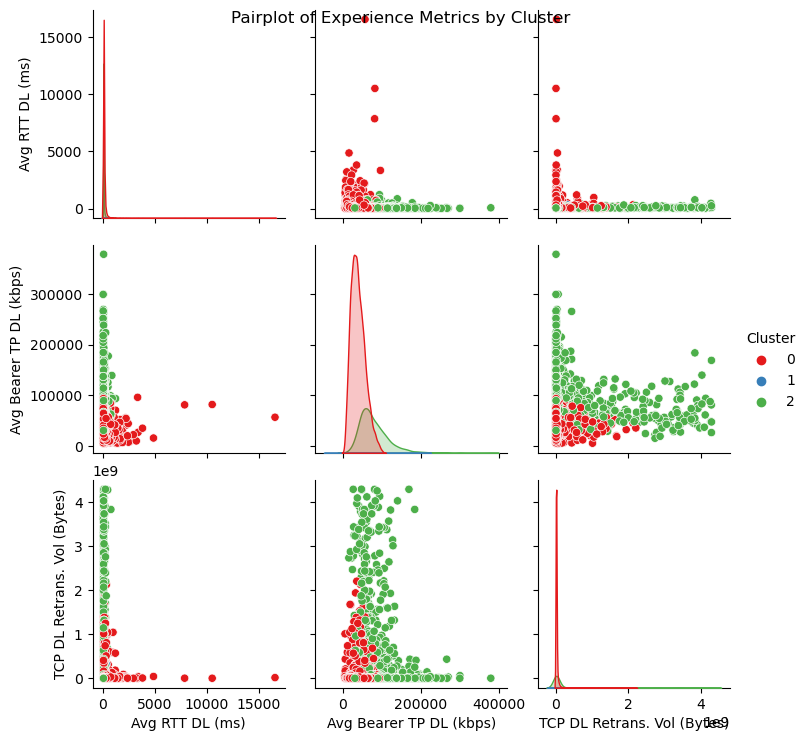

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns for clustering
experience_metrics = mydata[['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]

# Standardize the data
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(experience_metrics)

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
mydata['Cluster'] = kmeans.fit_predict(scaled_metrics)

# Display cluster sizes
cluster_sizes = mydata['Cluster'].value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes)

# Visualize clusters (pairplot for selected metrics)
sns.pairplot(mydata, vars=['Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)'], hue='Cluster', palette='Set1')
plt.suptitle('Pairplot of Experience Metrics by Cluster')
plt.show()
